## TAXI FARE ANALYSIS AND PREDICTION ##

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Taxi.csv")
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12244\532531843.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Taxi.csv")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [3]:
df.shape

(6405008, 18)

In [4]:
df.count()

VendorID                 6339567
tpep_pickup_datetime     6405008
tpep_dropoff_datetime    6405008
passenger_count          6339567
trip_distance            6405008
RatecodeID               6339567
store_and_fwd_flag       6339567
PULocationID             6405008
DOLocationID             6405008
payment_type             6339567
fare_amount              6405008
extra                    6405008
mta_tax                  6405008
tip_amount               6405008
tolls_amount             6405008
improvement_surcharge    6405008
total_amount             6405008
congestion_surcharge     6405008
dtype: int64

df.columns

In [5]:
data_type = df.dtypes
null_value = df.isnull().sum()

null_value, data_type

(VendorID                 65441
 tpep_pickup_datetime         0
 tpep_dropoff_datetime        0
 passenger_count          65441
 trip_distance                0
 RatecodeID               65441
 store_and_fwd_flag       65441
 PULocationID                 0
 DOLocationID                 0
 payment_type             65441
 fare_amount                  0
 extra                        0
 mta_tax                      0
 tip_amount                   0
 tolls_amount                 0
 improvement_surcharge        0
 total_amount                 0
 congestion_surcharge         0
 dtype: int64,
 VendorID                 float64
 tpep_pickup_datetime      object
 tpep_dropoff_datetime     object
 passenger_count          float64
 trip_distance            float64
 RatecodeID               float64
 store_and_fwd_flag        object
 PULocationID               int64
 DOLocationID               int64
 payment_type             float64
 fare_amount              float64
 extra                    float64
 

In [6]:
#cleaning the code based on column relevance

relevant_columns = [
    'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 
    'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 
    'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
    'tolls_amount', 'improvement_surcharge', 'congestion_surcharge'
]

df = df[relevant_columns]

In [7]:
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,2.5
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,2.5
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,2.5
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,0.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,0.0
5,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,0.0
6,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,0.0
7,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.5
8,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1.0,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,2.5
9,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,2.5


In [8]:
#now we will impute the other columns that have some missing values using mean median and mModuleNotFoundError

df['passenger_count'].fillna(df['passenger_count'].median(), inplace = True)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace = True)
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace = True)

#converting to date tTime the important corelevant_columns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Convert categorical variables to category type
categorical_columns = ['RatecodeID', 'payment_type']
for col in categorical_columns:
    df[col] = df[col].astype('category')

print(df.dtypes)

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                     category
PULocationID                      int64
DOLocationID                      int64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
congestion_surcharge            float64
dtype: object


In [9]:
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,2.5
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,2.5
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,2.5
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,0.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,0.0
5,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,0.0
6,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,0.0
7,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.5
8,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1.0,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,2.5
9,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,2.5


In [10]:
df['payment_type'].value_counts()

payment_type
1.0    4760338
2.0    1593834
3.0      32770
4.0      18065
5.0          1
Name: count, dtype: int64

In [11]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     6191977
2.0      157733
5.0       36296
3.0       13476
4.0        5130
99.0        350
6.0          46
Name: count, dtype: int64

In [12]:
df['fare_amount'].value_counts()

fare_amount
6.00      338926
6.50      334565
5.50      329035
7.00      325409
7.50      308165
           ...  
190.50         1
70.08          1
267.00         1
53.43          1
46.67          1
Name: count, Length: 5283, dtype: int64

In [13]:
df['trip_distance'].value_counts()

trip_distance
0.90     117864
0.80     117274
1.00     116454
0.70     111786
1.10     111512
          ...  
35.79         1
36.02         1
33.37         1
67.69         1
31.45         1
Name: count, Length: 5606, dtype: int64

**Data Cleaning**
**Define valid payment types (1: Credit card, 2: Cash)**

In [14]:
valid_payment_types = [1, 2]
df = df[df['payment_type'].isin(valid_payment_types)]

In [15]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,2.5
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,2.5
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,2.5
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,0.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,0.0


In [16]:
df.shape

(6354172, 15)

In [17]:
df['payment_type'].value_counts()

payment_type
1.0    4760338
2.0    1593834
3.0          0
4.0          0
5.0          0
Name: count, dtype: int64

**Filtering according to the Rate code**

In [18]:
valid_rate_codes = [1,2,3,4,5,6]

In [19]:
df = df[df['RatecodeID'].isin(valid_rate_codes)]

In [20]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,2.5
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,2.5
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,2.5
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,0.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,0.0


In [21]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     6145750
2.0      155598
5.0       34482
3.0       12987
4.0        4997
6.0          24
99.0          0
Name: count, dtype: int64

#### Plotting the distribution before identifying outliers ####

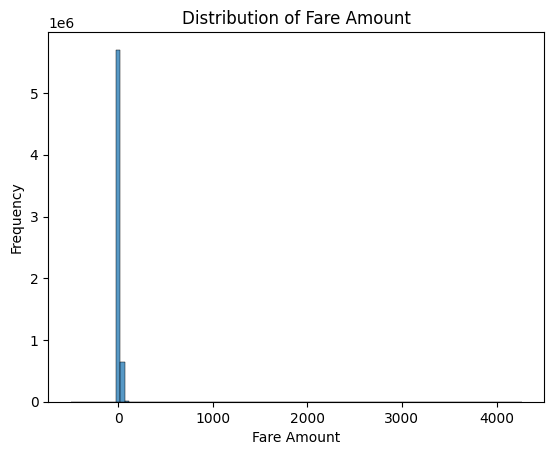

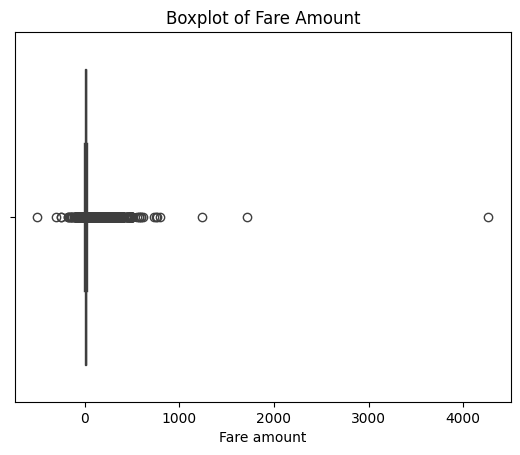

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['fare_amount'], bins=100)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()

sns.boxplot(x=df['fare_amount'])
plt.xlabel('Fare amount')
plt.title('Boxplot of Fare Amount')
plt.show()

#### Identify and Handle the outliers in Fare amount #####

In [23]:
# Use IQR to identify outliers
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound1 = Q1 - 1.5 * IQR
upper_bound1 = Q3 + 1.5 * IQR


df = df[(df['fare_amount'] >= lower_bound1) & (df['fare_amount'] <= upper_bound1)]

In [24]:
print(lower_bound1)
print(upper_bound1)

-4.75
25.25


In [25]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,2.5
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,2.5
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,2.5
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,0.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,0.0


In [26]:
df['fare_amount'].value_counts()

fare_amount
6.00     337647
6.50     333376
5.50     327778
7.00     324333
7.50     307139
          ...  
9.75          1
1.15          1
21.09         1
15.42         1
19.59         1
Name: count, Length: 1220, dtype: int64

#### Plotting the distribution after identifying outliers ####

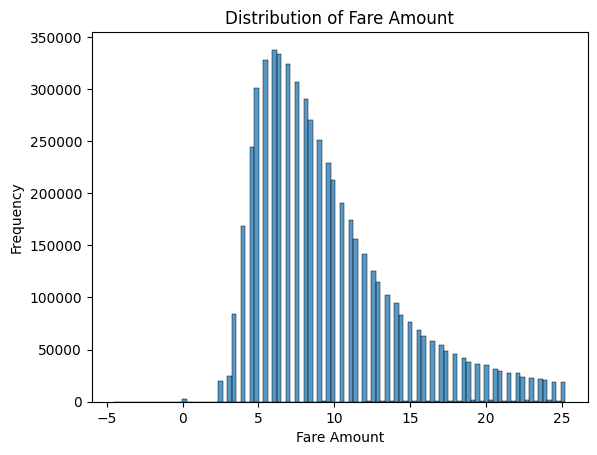

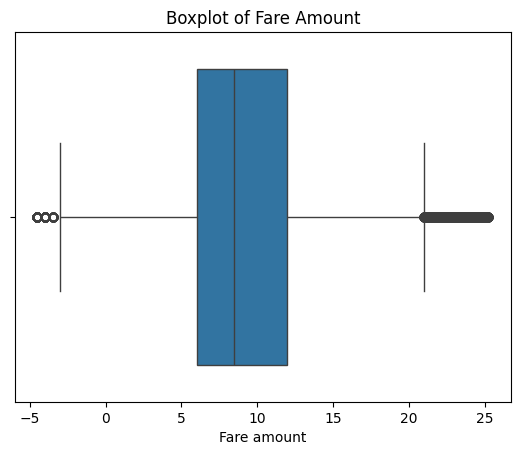

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['fare_amount'], bins=100)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()

sns.boxplot(x=df['fare_amount'])
plt.xlabel('Fare amount')
plt.title('Boxplot of Fare Amount')
plt.show()

#### Plotting the distribution before identifying outliers ####

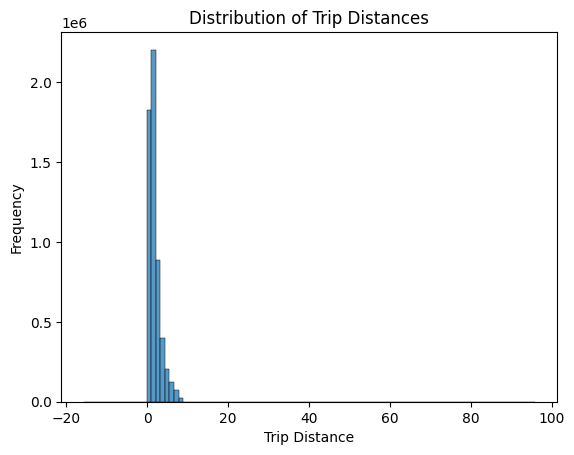

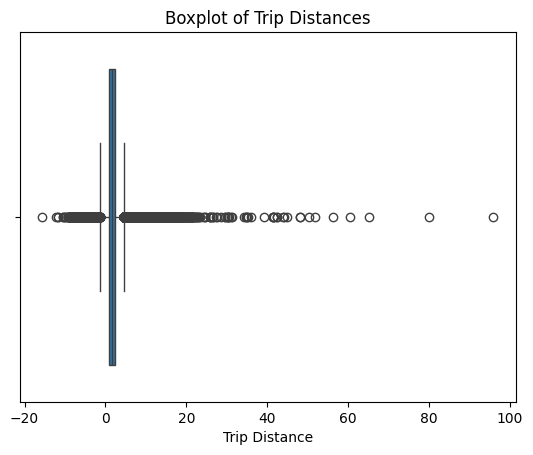

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['trip_distance'], bins=100)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.show()

sns.boxplot(x=df['trip_distance'])
plt.xlabel('Trip Distance')
plt.title('Boxplot of Trip Distances')
plt.show()

#### Similarly looking at the outliers in The Trips Distance ####

In [29]:
# Use IQR to identify outliers
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

In [30]:
print(lower_bound)
print(upper_bound)

-1.3399999999999999
4.66


In [31]:
df['trip_distance'].value_counts()

trip_distance
 0.90    116565
 0.80    115998
 1.00    115251
 0.70    110424
 1.10    110373
          ...  
-0.30         1
-0.76         1
-0.71         1
-0.40         1
-0.99         1
Name: count, Length: 537, dtype: int64

In [32]:
min(df['trip_distance'])

-1.33

#### Plotting the distribution after identifying outliers ####

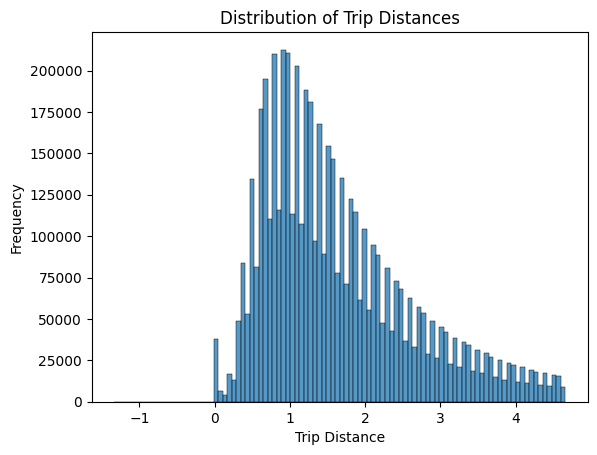

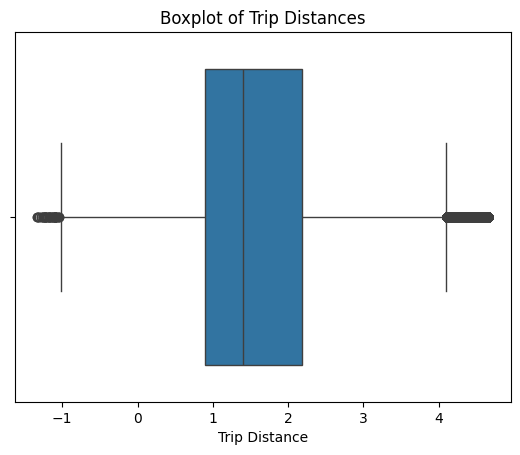

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['trip_distance'], bins=100)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.show()

sns.boxplot(x=df['trip_distance'])
plt.xlabel('Trip Distance')
plt.title('Boxplot of Trip Distances')
plt.show()

#### Saving the cleaned file into a new csv file ####

In [34]:
cleaned_file = 'clean_taxi.csv'
df.to_csv(cleaned_file, index = False)
print(f"The cleaned file {cleaned_file} was saved successfully")

The cleaned file clean_taxi.csv was saved successfully
